In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
digits = datasets.load_digits()
x = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
for i in range(1,8):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train, y_train)
    print(kNN.score(X_test, y_test))

0.9888888888888889
0.9833333333333333
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9861111111111112
0.9916666666666667


In [8]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.97      0.99        40
           2       1.00      1.00      1.00        35
           3       0.95      0.97      0.96        37
           4       1.00      1.00      1.00        36
           5       0.98      0.98      0.98        42
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        29
           8       0.97      0.93      0.95        30
           9       0.95      0.98      0.96        42

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



<AxesSubplot:>

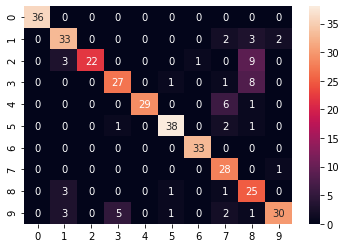

In [9]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

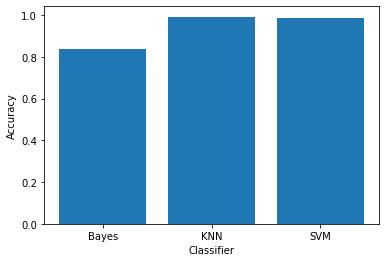

In [16]:
scores = [bayes.score(X_test, y_test), kNN.score(X_test, y_test), svm.score(X_test, y_test)]
height = [1, 2 ,3]
labels = ['Bayes', 'KNN', 'SVM']
plt.bar(height, scores, tick_label = labels, width = 0.8)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()

In [34]:
df = pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [36]:
df.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


<AxesSubplot:>

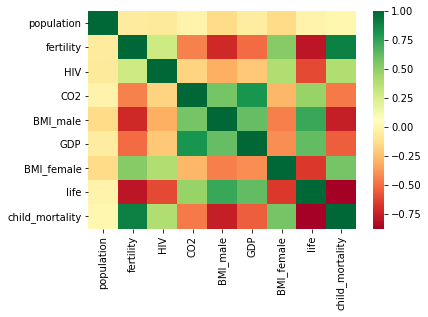

In [37]:
sns.heatmap(df.corr(), cmap="RdYlGn")

<ipython-input-35-f163b4cc4d2a>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:,None], y)
<ipython-input-35-f163b4cc4d2a>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:,None], y))
<ipython-input-35-f163b4cc4d2a>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax = plt.plot(x,y, 'bo', x, regression.predict(x[:, None]), '-k')


0.6192442167740035


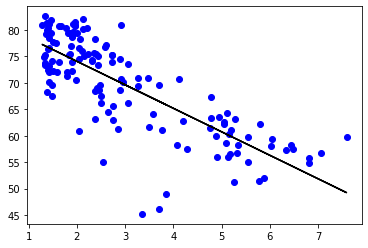

In [35]:
x = df["fertility"]
y = df["life"]

regression = LinearRegression()
regression.fit(x[:,None], y)
print(regression.score(x[:,None], y))
fig, ax = plt.plot(x,y, 'bo', x, regression.predict(x[:, None]), '-k')

0.8974995317332959


ValueError: too many values to unpack (expected 2)

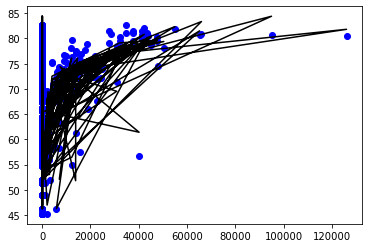

In [24]:
x = df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y = df["life"]

regression = LinearRegression()
regression.fit(x, y)
print(regression.score(x, y))
fig, ax = plt.plot(x,y, 'bo', x, regression.predict(x), '-k')

In [26]:
cross_val_score(regression, x[:, None], y, cv=5)

TypeError: '(slice(None, None, None), None)' is an invalid key

In [27]:
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


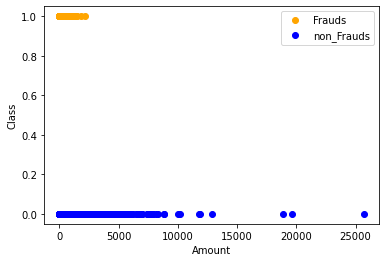

In [30]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]

plt.plot(frauds.Amount, frauds.Class, 'o', color="orange", label="Frauds")
plt.plot(non_frauds.Amount, non_frauds.Class, 'o', color="blue", label="non_Frauds")
plt.xlabel('Amount')
plt.ylabel('Class')
plt.legend()
plt.show()

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[284156    159]
 [   151    341]]


<AxesSubplot:>

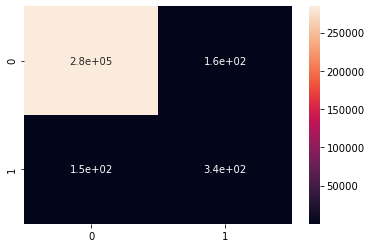

In [32]:
x = df.drop("Class", axis=1)
y = df.Class

log_regression = LogisticRegression()
log_regression.fit(x, y)
y_pred = log_regression.predict(x)
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True)